,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4213 entries, 4201 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4213 non-null   object 
 1   Location           4213 non-null   object 
 2   Year               4213 non-null   int64  
 3   Kilometers_Driven  4213 non-null   int64  
 4   Fuel_Type          4213 non-null   object 
 5   Transmission       4213 non-null   object 
 6   Owner_Type         4213 non-null   object 
 7   Mileage            4212 non-null   object 
 8   Engine             4189 non-null   object 
 9   Power              4189 non-null   object 
 10  Seats              4185 non-null   float64
 11  New_Price          580 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 427.9+ KB
None


Mahindra XUV500 W8 2WD                      35
Maruti Swift VDI                            31
Maruti Ritz VDi                             26
Hyundai i10 Sportz                          25
Maruti Swift Dzire VDI                      24
                                            ..
Tata Hexa XTA                                1
Skoda Octavia Ambition 1.4 TSI MT            1
Nissan Terrano XV 110 PS Limited Edition     1
Chevrolet Enjoy 1.4 LS 8                     1
Hyundai Grand i10 Era                        1
Name: Name, Length: 1592, dtype: int64

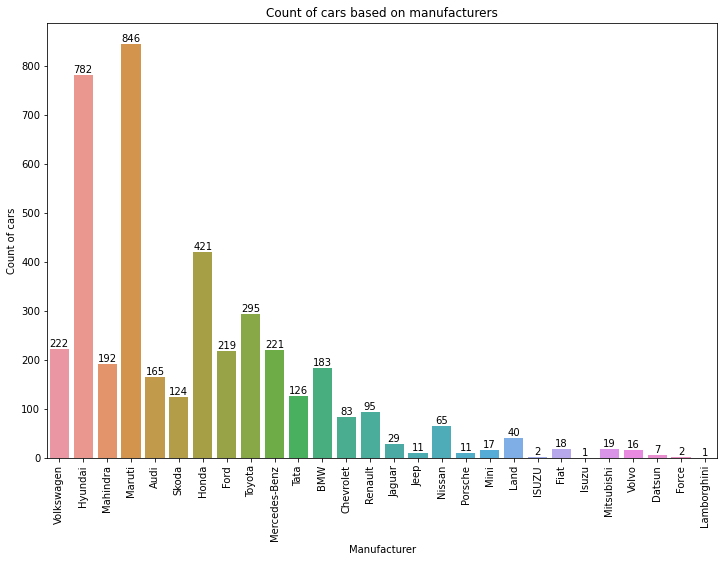


 ______________________________ LINEAR REGRESSION ______________________________
[ 4.36324055 11.48161197  9.7485241   5.00748097  4.50239948]

The r squared error is:
0.7008908549416717


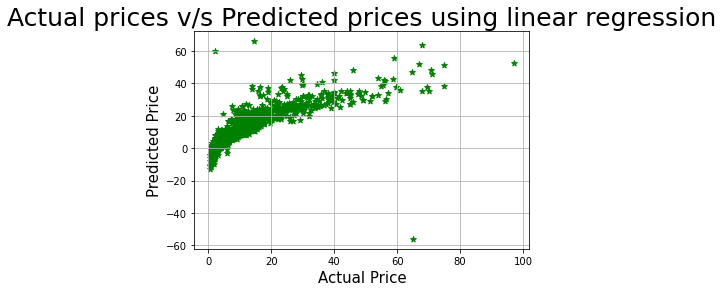


 ______________________________ RANDOM FOREST REGRESSION ______________________________
[ 4.1543 12.9917  8.3717  2.233   2.9713]

The r squared error is:
0.8853202493269176


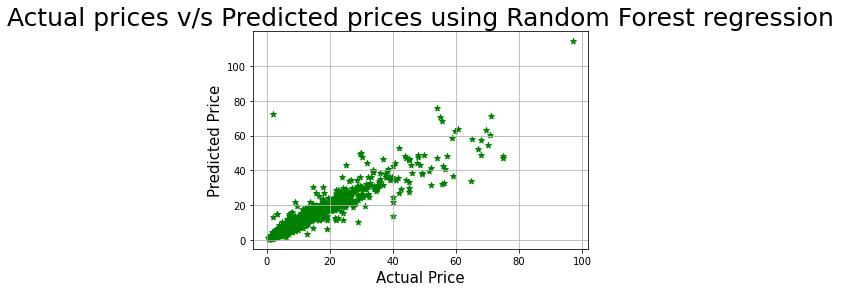


 ______________________________ LASSO REGRESSION ______________________________
[ 3.63169819 12.43939251 13.01055258  5.03715705  5.77872417]

The r squared error is:
0.6895685836270733


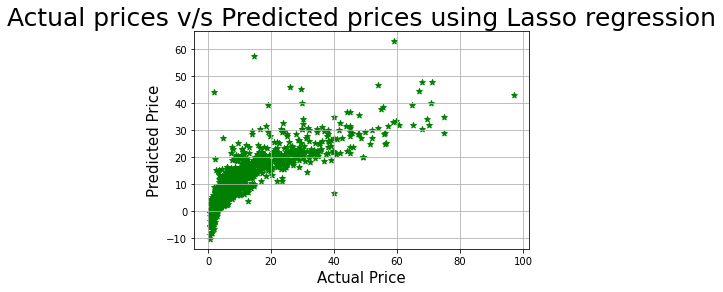

In [1]:
# importing datetime to handle year, numpy to work with arrays and pandas to read in the dataset files, matplotlib & seaborn for plotting and sklearn for various machine learning models.
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


# reading the dataset.
dataset = pd.read_csv(r"S:\srini\poai_final\Car-Price-Prediction-master\data\dataset.csv")

# removing unwanted data 
dataset.drop(["sno"],axis="columns",inplace=True)

#sample of dataset
display(dataset.head())

# splitting the dataset into train and test datasets.
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# columns of dataset
print(X_train.info())


# various cars in dataset
display(X_train["Name"].value_counts())


make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

# to see number of cars by each manufacturer
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")
plt.show()

# dropping unwanted cloumns from training set
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

# training manufacture time column
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

# training kilometers_driven 
# the data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.
X_train["Kilometers_Driven"]

# converting string into numerical data and training column mileage.
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)
X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

# checking for missing values.
sum(X_train["Mileage"].isnull())
sum(X_test["Mileage"].isnull())

# replacing the missing values with the mean value of the column based on the training data.                                         
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

# the Engine values are defined in CC so I need to remove CC from the data. Similarly, Power has bhp, so remove bhp from it. Also, as there are missing values in Engine, Power and Seats, again replacing missing values with the mean.                                        
cc_train = X_train["Engine"].str.split(" ", expand = True)
cc_test = X_test["Engine"].str.split(" ", expand = True)
X_train["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
X_test["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)
X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

X_train.drop(["New_Price"], axis = 1, inplace = True)
X_test.drop(["New_Price"], axis = 1, inplace = True)

# data processing, let's create dummy columns for categorical columns before beginning of training.
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

# fill in all missing columns with zeros.                                           
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

# last step of data processing is scaling the data.                                           
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

# create linear regression model to train on the data and use it for future predictions.
print("\n","_"*30,"LINEAR REGRESSION","_"*30)
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
print(y_pred[0:5])

# R squared Error
print("\nThe r squared error is:")
print(r2_score(y_test, y_pred))

# Visualize the actual prices and Predicted prices
plt.scatter(y_test,y_pred,c='g',marker='*')
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.title('Actual prices v/s Predicted prices using linear regression',fontsize=25)
plt.grid()
plt.show()

# create Random Forest regression model to train on the data and use it for future predictions.                                           
print("\n","_"*30,"RANDOM FOREST REGRESSION","_"*30)
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(y_pred[0:5])

# R squared Error
print("\nThe r squared error is:")
print(r2_score(y_test, y_pred))

# Visualize the actual prices and Predicted prices
plt.scatter(y_test,y_pred,c='g',marker='*')
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.title('Actual prices v/s Predicted prices using Random Forest regression',fontsize=25)
plt.grid()
plt.show()

# create LASSO regression model to train on the data and use it for future predictions.                                           
print("\n","_"*30,"LASSO REGRESSION","_"*30)
lasso= Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
print(y_pred[0:5])

# R squared Error
print("\nThe r squared error is:")
print(r2_score(y_test,y_pred))

# Visualize the actual prices and Predicted prices
plt.scatter(y_test,y_pred,c='g',marker='*')
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.title('Actual prices v/s Predicted prices using Lasso regression',fontsize=25)
plt.grid()
plt.show()
               